In [175]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
pd.set_option('display.max_columns', None)

In [176]:
df = pd.read_csv("SCMS.csv",encoding='iso-8859-1')

Let's see how much data is missing; missing data is represented as white space

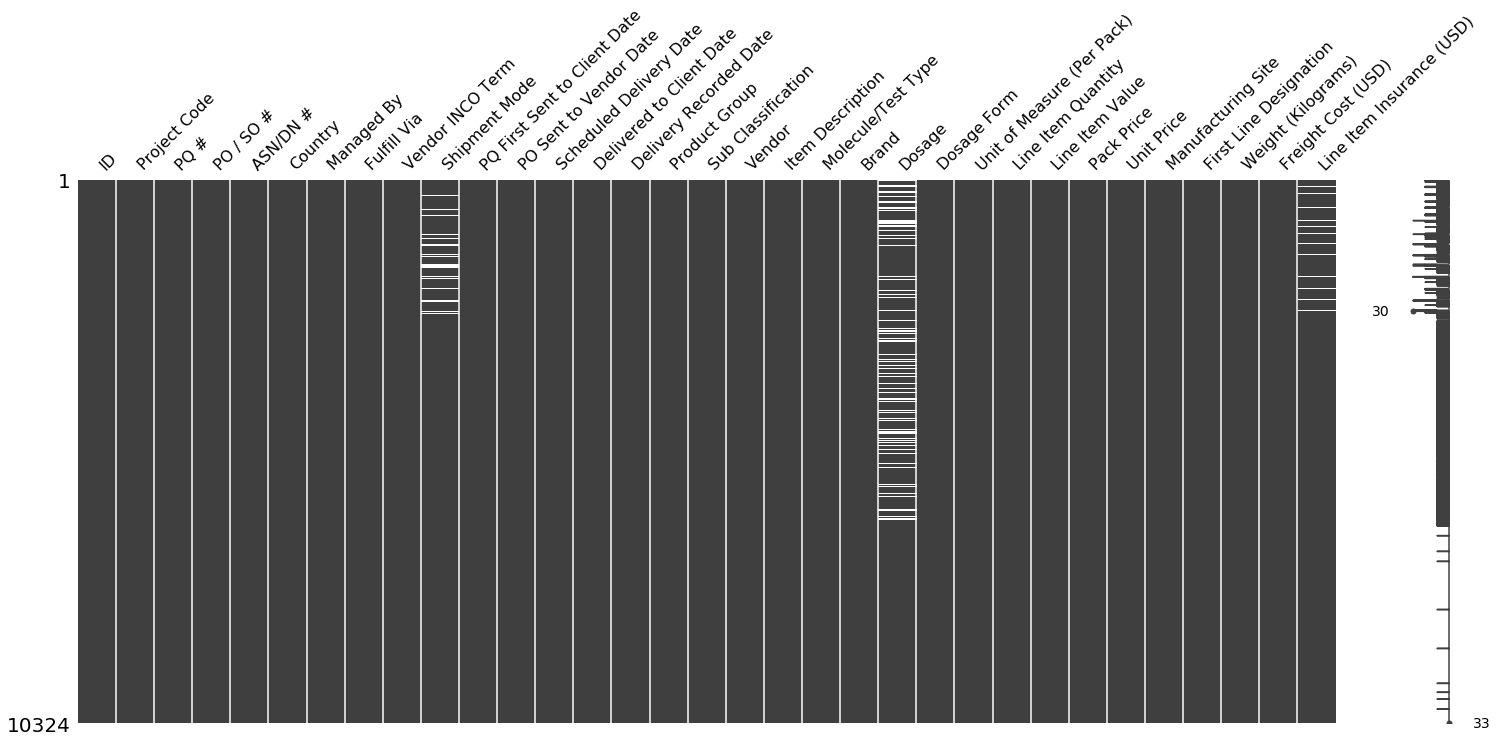

In [190]:
msno.matrix(df,filter==1000)

In [191]:
df.shape

(10324, 33)

In [192]:
df['Brand']=df['Brand'].astype('category')
df['Vendor']=df['Vendor'].astype('category')
df['Product Group']=df['Product Group'].astype('category')
df['Sub Classification']=df['Sub Classification'].astype('category')

In [193]:
travel = {'Air Charter':'Air','Truck':'Land','Ocean':'Sea'}

In [194]:
df.replace(travel,inplace=True)

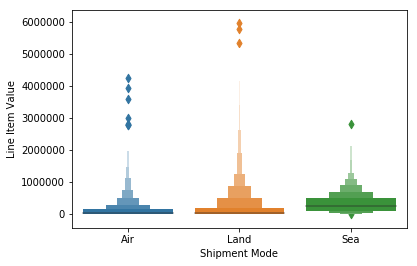

In [195]:
sns.boxenplot(x='Shipment Mode',y='Line Item Value',data=df)

In [277]:
exp_df = df.loc[df['Line Item Value'] > 2000000]

In [278]:
exp_df['Brand'].unique()

[Atripla, Truvada, Generic]
Categories (3, object): [Atripla, Truvada, Generic]

Atripla and Truvada are the brands with high line item value sales (as well as generics)

In [284]:
exp_df.shape

(69, 33)

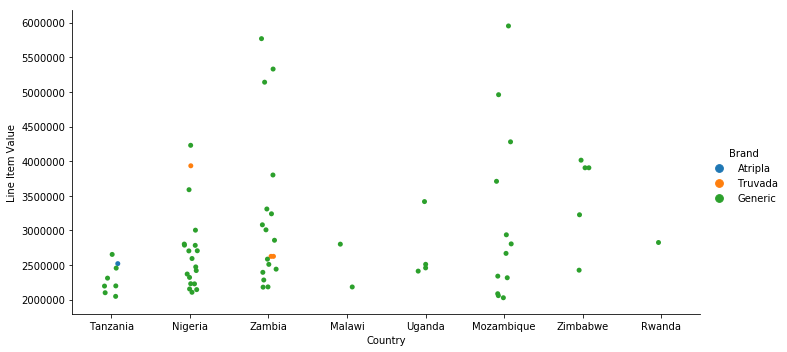

In [285]:
sns.catplot(x='Country',y='Line Item Value',hue_order=['Atripla','Truvada','Generic'],hue='Brand',data=exp_df,aspect=2)

Zambia and Mozambique contributing to some of the highest sales.

In [219]:
country_df = df.loc[(df['Country'] == 'Zambia') | (df['Country'] == 'Mozambique')]

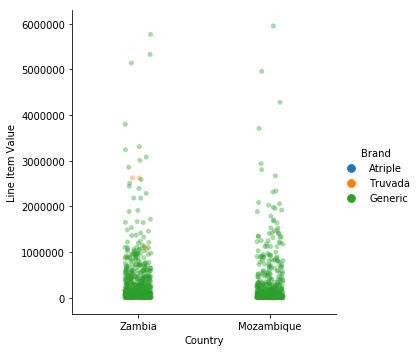

In [234]:
sns.catplot(x='Country',y='Line Item Value',hue_order=['Atriple','Truvada','Generic'],hue='Brand',data=country_df,alpha=.4)

In [256]:
(country_df.groupby('Country')['Brand'].count())/df.groupby('Country')['Brand'].count()*100

Country
Afghanistan             NaN
Angola                  NaN
Belize                  NaN
Benin                   NaN
Botswana                NaN
Burkina Faso            NaN
Burundi                 NaN
Cameroon                NaN
Congo, DRC              NaN
Côte d'Ivoire           NaN
Dominican Republic      NaN
Ethiopia                NaN
Ghana                   NaN
Guatemala               NaN
Guinea                  NaN
Guyana                  NaN
Haiti                   NaN
Kazakhstan              NaN
Kenya                   NaN
Kyrgyzstan              NaN
Lebanon                 NaN
Lesotho                 NaN
Liberia                 NaN
Libya                   NaN
Malawi                  NaN
Mali                    NaN
Mozambique            100.0
Namibia                 NaN
Nigeria                 NaN
Pakistan                NaN
Rwanda                  NaN
Senegal                 NaN
Sierra Leone            NaN
South Africa            NaN
South Sudan             NaN
Sudan       

In [287]:
high_sales = df.loc[(df['Country'] == 'Zambia') | (df['Country'] == 'Mozambique')]

In [292]:
high_sales.groupby('Country')['Line Item Value'].sum()

Country
Mozambique    1.820247e+08
Zambia        2.469888e+08
Name: Line Item Value, dtype: float64

Mozambique: `$`182 M and Zambia: `$`247 M of Total Sales

In [301]:
df.groupby('Country')['Line Item Value'].sum().sum()

1627584457.2900007

In [304]:
(high_sales.groupby('Country')['Line Item Value'].sum().sum())/(df.groupby('Country')['Line Item Value'].sum().sum())*100

26.358910544299892

26% of sales comes from these high ticket items to these two countries